In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pylops
from scipy import linalg as la
from scipy import sparse
from trips.io import build_x_true
from trips.operators import gaussian_blur_operator, first_derivative_operator
# from trips.solvers.GKS import TP_gks
from trips.solvers.gks_all import *

### construct a true image

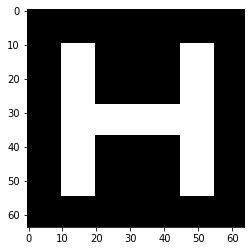

In [2]:
x_true = build_x_true().reshape(-1,1)
plt.imshow(x_true.reshape(64,64), cmap='Greys_r')

### apply an operator

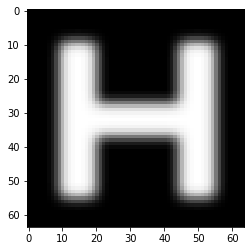

In [3]:
blur_operator = gaussian_blur_operator([9,9],2,64,64)

b_true = blur_operator @ x_true

plt.imshow( b_true.reshape(64,64), cmap='Greys_r')

### contaminate with noise

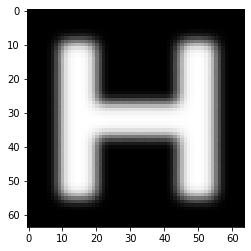

In [4]:
noise_level = 0.001
noise = np.random.randn(64*64)
e = noise_level * np.linalg.norm(b_true) / np.linalg.norm(noise) * noise
e = e.reshape(-1,1)
b = b_true + e
plt.imshow( b.reshape(64,64), cmap='Greys_r')

### construct regularization operators

In [5]:
I = pylops.Identity(4096) # identity operator
D = first_derivative_operator(n=4096) # first derivative operator
D2 = D @ D # second derivative operator

### run GKS with GCV

In [7]:
(x, info) = GKS(blur_operator, b, D, projection_dim = 2, n_iter = 40, regparam='gcv', x_true=x_true)

running GKS...: 100%|██████████| 40/40 [04:53<00:00,  7.35s/it]


In [8]:
info['relError']

[0.30595734239597666,
 0.28920178928188417,
 0.2778597918049021,
 0.26496451104325464,
 0.255258414138889,
 0.2472835372626808,
 0.2419966135560957,
 0.23932556680515646,
 0.23700728395917253,
 0.23496622456957145,
 0.23222957187678966,
 0.22977284887840868,
 0.22733330667311943,
 0.22464197885746717,
 0.22232870791048592,
 0.22087782866812675,
 0.21973402097937528,
 0.2187792867660167,
 0.2177465249082954,
 0.21658868282237315,
 0.21572785994322513,
 0.2148153660647871,
 0.21423376567313276,
 0.213652108309343,
 0.21280952661245373,
 0.21206354146245404,
 0.21144940185637529,
 0.21064379596311247,
 0.20967166270599005,
 0.2087344504814279,
 0.2077384693999034,
 0.20696915223018786,
 0.20584233009854017,
 0.20401470892016615,
 0.20197998784196883,
 0.20072887473000636,
 0.19922537606838514,
 0.19839747186825174,
 0.19706608798882888,
 0.19588511865654332]

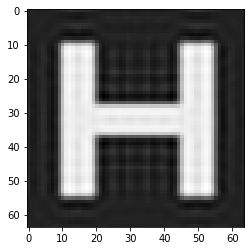

In [9]:
plt.imshow(x.reshape(64,64), cmap='Greys_r')

### convergence

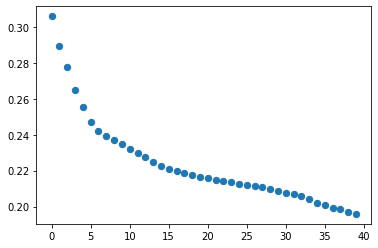

In [10]:
plt.scatter(range(len(info['relError'])), info['relError'], s=40)

### history of solutions

NameError: name 'x_history' is not defined

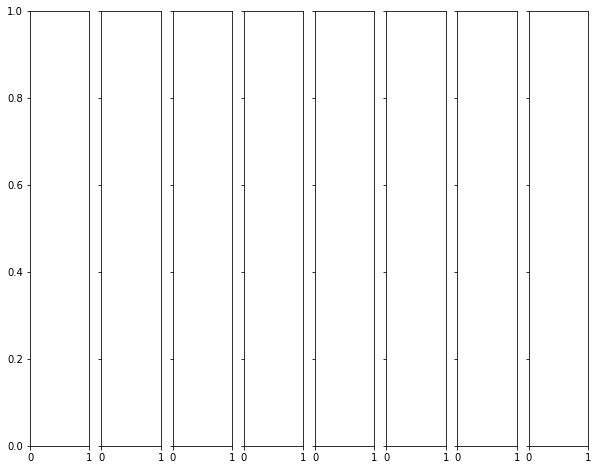

In [11]:
fig, ax = plt.subplots(1, 8, figsize=(10, 8), sharey=True)
for ii in range(8):
    ax[ii].imshow(x_history[2+ii].reshape(64,64), cmap='Greys_r')
plt.show()

### history of lambda values

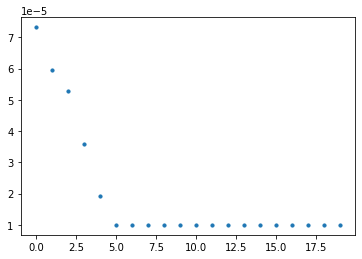

In [15]:
plt.scatter(range(len(lambda_history)), lambda_history, s=10)

### run GKS with DP

In [16]:
(x, x_history, lambdah, lambda_history, res_history, rre_history) = GKS(blur_operator, b, D, projection_dim=2, n_iter=10, regparam='dp', x_true=x_true, eta=1.01, delta=la.norm(e), tol=10**(-16))

running GKS...:   0%|          | 0/10 [00:00<?, ?it/s]/Users/mirjetapasha/opt/anaconda3/lib/python3.8/site-packages/trips/parameter_selection/discrepancy_principle.py:90: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  tikh_sol = lambda reg_param: np.linalg.lstsq(np.vstack((A, np.sqrt(reg_param)*L)), np.vstack((b.reshape((-1,1)), np.zeros((L.shape[0],1)))))[0]
/Users/mirjetapasha/opt/anaconda3/lib/python3.8/site-packages/trips/parameter_selection/discrepancy_principle.py:90: RuntimeWarning: invalid value encountered in sqrt
  tikh_sol = lambda reg_param: np.linalg.lstsq(np.vstack((A, np.sqrt(reg_param)*L)), np.vstack((b.reshape((-1,1)), np.zeros((L.shape[0],1)))))[0]
running GKS...:   0%|          | 0/10 [00:00<?, ?it/s]


LinAlgError: SVD did not converge in Linear Least Squares

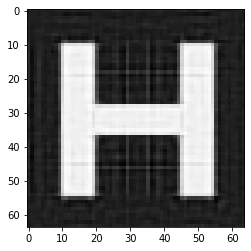

In [ ]:
plt.imshow(x.reshape(64,64), cmap='Greys_r')

### convergence

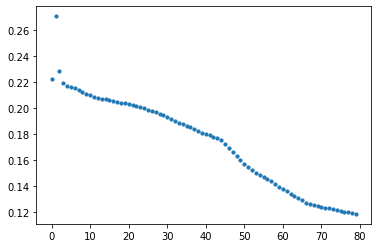

In [17]:
plt.scatter(range(len(rre_history)), rre_history, s=10)

### history of solutions

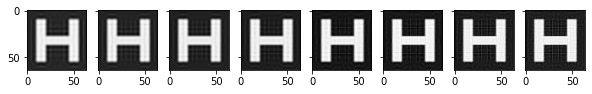

In [18]:
fig, ax = plt.subplots(1, 8, figsize=(10, 10), sharey=True)

for ii in range(8):
    ax[ii].imshow(x_history[9+10*ii].reshape(64,64), cmap='Greys_r')

plt.show()

### history of lambda values

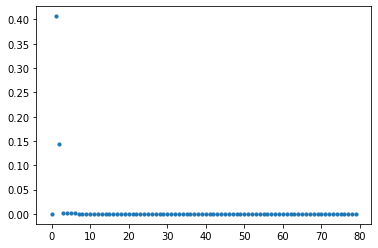

In [19]:
plt.scatter(range(len(lambda_history)), lambda_history, s=10)

### run GKS with a sequence of parameter values

In [20]:
regvals = [0.001*(0.5**(x)) for x in range(0,80)]

In [21]:
(x, x_history, lambdah, lambda_history, res_history, rre_history) = GKS(blur_operator, b, D, regparam=regvals, projection_dim=3, n_iter=80, x_true=x_true, tol=10**(-16))

3


running GKS...: 100%|██████████| 80/80 [00:03<00:00, 22.65it/s] 


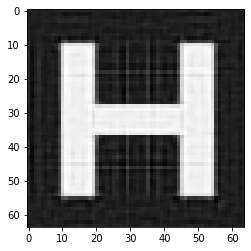

In [22]:
plt.imshow(x.reshape(64,64), cmap='Greys_r')

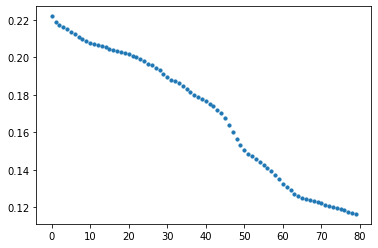

In [23]:
plt.scatter(range(len(rre_history)), rre_history, s=10)

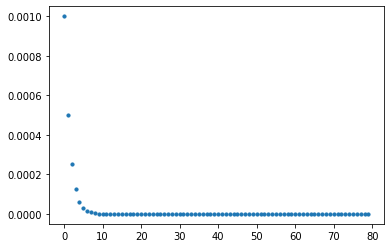

In [24]:
plt.scatter(range(len(lambda_history)), lambda_history, s=10)